In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical



In [83]:
train_data = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
test_data = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
train_labels = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
test_labels = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)





scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


train_labels = to_categorical(train_labels - 1, num_classes=6) 
test_labels = to_categorical(test_labels - 1, num_classes=6)


train_data = train_data.reshape(train_data.shape[0], 1, train_data.shape[1])
test_data = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


C:\Users\chatt\AppData\Local\Temp\ipykernel_4792\2911774520.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
C:\Users\chatt\AppData\Local\Temp\ipykernel_4792\2911774520.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)


Training data shape: (7352, 1, 561)
Test data shape: (2947, 1, 561)


C:\Users\chatt\AppData\Local\Temp\ipykernel_4792\2911774520.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_labels = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
C:\Users\chatt\AppData\Local\Temp\ipykernel_4792\2911774520.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_labels = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape):
    model = Sequential()


    model.add(LSTM(20, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(5, activation='relu', input_shape=input_shape, return_sequences=False))
    # model.add(Dropout(0.2))
   
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = build_lstm_model((train_data.shape[1], train_data.shape[2]))
model.summary()


C:\Users\chatt\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 1, 20)          │        46,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 1, 20)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 5)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,206 (184.40 KB)

 Trainable params: 47,206 (184.40 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history = model.fit(
    train_data, 
    train_labels, 
    epochs=30, 
    batch_size=64, 
    validation_data=(test_data, test_labels),
)


Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2742 - loss: 1.6037 - val_accuracy: 0.7218 - val_loss: 0.9976
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5748 - loss: 1.1850 - val_accuracy: 0.7676 - val_loss: 0.8075
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6566 - loss: 0.9755 - val_accuracy: 0.7981 - val_loss: 0.6712
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.8443 - val_accuracy: 0.8140 - val_loss: 0.4621
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.6798 - val_accuracy: 0.8409 - val_loss: 0.3505
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - loss: 0.5745 - val_accuracy: 0.9118 - val_loss: 0.2990
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7792 - loss: 0.5290 - val_accuracy: 0.8955 - val_loss: 0.2935
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4938 - val_accuracy: 0.

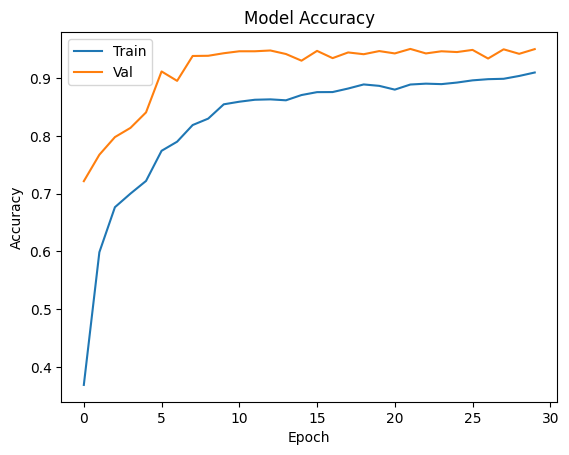

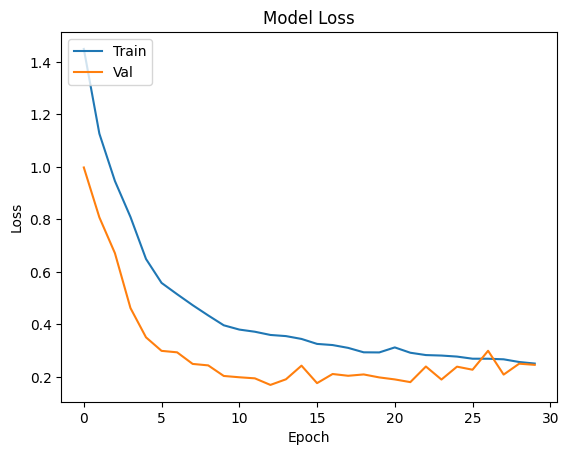

In [89]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [90]:

predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)



93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


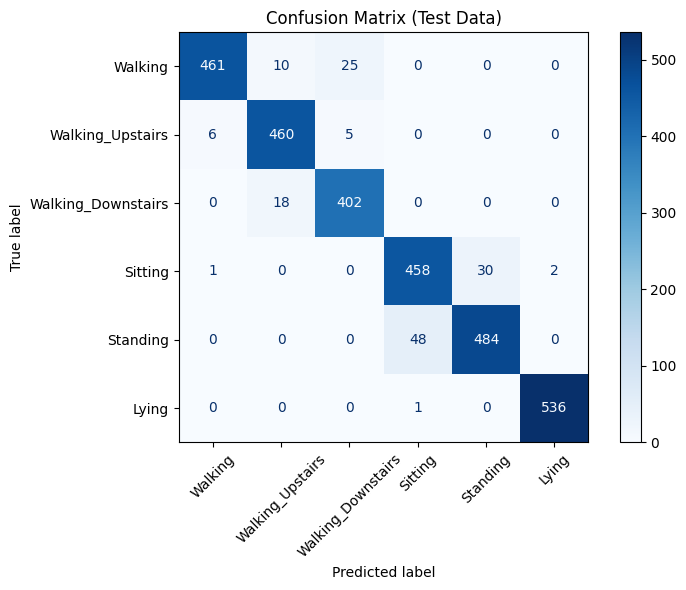

93/93 - 0s - 3ms/step - accuracy: 0.9505 - loss: 0.2458
Test Accuracy: 95.05%


In [91]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(test_data)

# Convert one-hot labels and predicted probabilities to class indices
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Class names
class_names = ['Walking', 'Walking_Upstairs', 'Walking_Downstairs', 'Sitting', 'Standing', 'Lying']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix (Test Data)')
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

